In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly import subplots, tools
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, plot, iplot
# import re

# from wordcloud import WordCloud, STOPWORDS 
from warnings import filterwarnings
filterwarnings('ignore')
from pathlib import Path
import glob
import random
import itertools
from itertools import islice
from operator import itemgetter
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

sns.set_theme(style="whitegrid")
sns.color_palette("cubehelix")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Department of Data-induced Maladies and Injuries
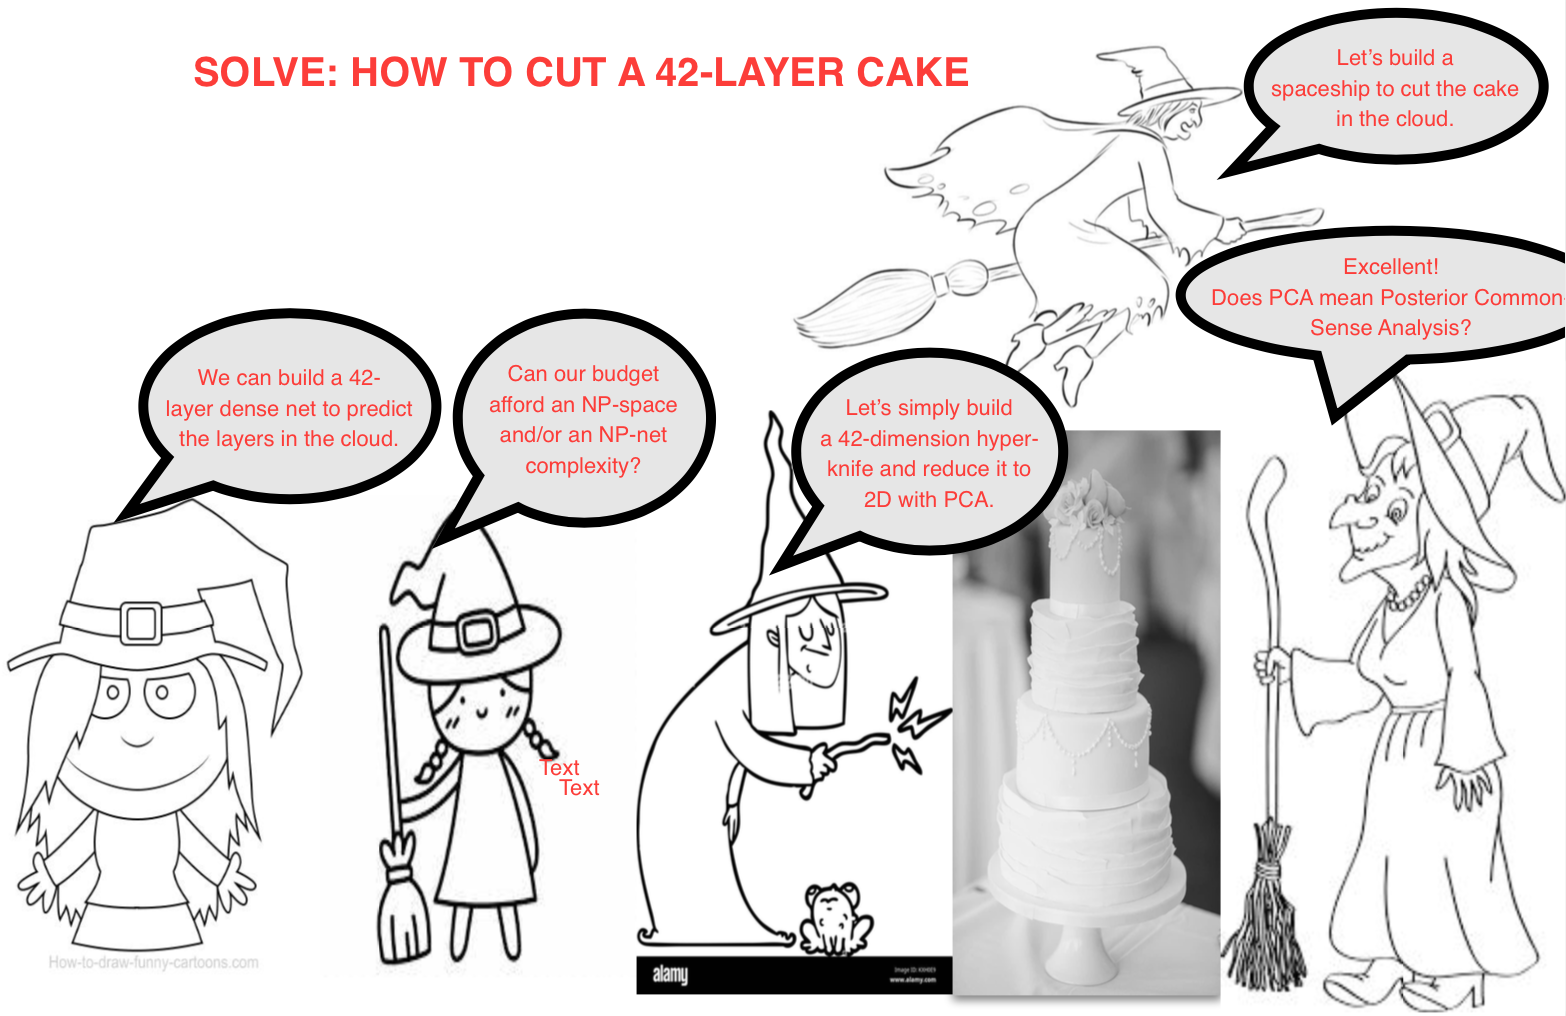

## Resolve: The Data Science Dystopia

Data Science and Machine Learning have become an irrepressible flow in today's world. Heralded by the data-deluge and the affordable high capacity compute power, most companies are paving their ways towards unraveling actionable insights from data. Very indulging, indeed!

Have you ever found yourself lost in the Data Wonderland? How did you feel while going through the survey questionairre (42 Questions)? Here's what I felt:

<div style="text-align:center;" class="alert alert-block alert-warning"><b>
With langs and tools all too scary, <br>
Learning path looks so very dreary.
</b></div>
    
So, the BIG question that arose in my mind is this: <br>

<div style="text-align:center;" class="alert alert-block alert-info"><b>
With these options and tools available, are we supporting the growth or the distraction of Data Science?
</b></div>

To put it simply: many new dimensions are being added to Data Science over the course of time; such as, Cloud Computing, Big Data, ML Frameworks and Packages, to name a few. Does it help us focus on solving the real Data problems efficiently, or diverge our attention to the auxiliaries? If it is the latter, that'd mean Data Science is not serving the purpose it is intended to. This necessitates the need to conduct a health-checkup of the Data Practitioners through the lenses of the core notion of Data Science. This notebook, therefore, is an endeavor towards identifying and resolving the Data Science Dystopia based on the Kaggle Survey Responses 2021.
 

### Disclaimer

1. The insights and conclusions have been drawn here from the Kaggle Survey Data 2021, which may not represent the overall Data Science population. 

1. There is a non-zero probability that the responses of this survey may be influenced by personal biases in understanding and judgement.


### What is trending

- [1. Data Science Definition Revisited](#section_ds_definition)

- [2. Is Data Science World in Dystopia?](#section_dystopia)
    - [2.1 Search: The Fellows of Data Science](#section_basic_analysis)
    - [2.2 Data Enthusiasts: An Overlooked Thread](#section_enthusiasts)
    - [2.3 Job title "Data Scientist/Analyst": Compromises in Quality](#section_jobtitle_basic)
    - [2.4 Summary: Data Science a hype, flaws in recruitment and/or adoption?](#section_hype_flaws)
        
- [3. Data Science Workforce Analysis](#section_workforce)
    - [3.1 Industry](#section_industry)
    - [3.2 Job Title](#section_jobtitle)
    - [3.3 Education](#section_edu)
    - [3.4 Programming Experience](#section_progexp)
    - [3.5 Machine Learning Experience¶](#section_mlexp)
    - [3.6 Summary: In-Demand Skillset, Job Role not Well-Defined, High Entry Bar](#section_indemand)
    
- [4. Induction in the Data Science Wonderland](#section_induction)
    - [4.1 Starter Pack: A 4-piece Data Science Toolkit](#section_starter)
    - [4.2 Activities](#section_activities)
    - [4.3 The Data Science Witchcraft Authority](#section_authority)
    - [4.4 Induction Summary: Strenuous Job, Online Learning Popular, Basic Toolkit](#section_induction_summary)
      
- [5. Closing Remarks](#section_closing)

## <a id="section_ds_definition">1. Data Science Definition Revisited</a>

The web gets inundated with many exciting news, visualizations and predictions arising from the mining of massive data. The forecasts by www.fivethirtyeight.com come true like prophecies quite often; e.g., the outcome of the US Presidential Election in 2012. So, it is no wonder, a Data Admirer may want to get to know more closely about the Data Scientists, specifically, their responsibilities and qualifications. Here is a couple of definitions (quoted from: cs109, Harvard University).

<div class="alert alert-block alert-success">
<b>Data Science.</b> To gain insights into data through computation, statistics, and visualization.
<br>

<b>Data Scientist.</b> A data scientist is someone who knows more statistics than a computer scientist and more computer science than a statistician.
<br>
    
<b>Data Scientist</b> = statistician + programmer + coach + storyteller + artist.
<br>
</div>
    
The more one explores the definitions in this field, the more confusions are supposed to enshroud one's mind. So, instead of making an attempt to be accurate, let's stick to our promise and define Data Science with respect to its  core aspects.

<div class="alert alert-block alert-success">
<b>Data Science.</b> Is mainly concerned with extracting insights from data by means of statistics and programming.
</div>

The inclusion of statistics and programming here is required for the sake of efficient handling of data and preferably, the huge effusion of data.

## <a id="section_utility">Utility Functions</a>

In [ ]:
## utility function for labeled bar charts
def show_values_on_bars(labels, axs, h_v="v", space=0.4, labelsign="%"):
    def _show_on_single_plot(ax):
        i = 0
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = "{:.1f}{}".format(labels[i], labelsign) ##int(p.get_height())
                ax.text(_x, _y, value, ha="center", va="top", fontweight="semibold") 
                i += 1
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - float(space)
                value = "{:.1f}{}".format(labels[i], labelsign) ##int(p.get_width())
                ax.text(_x, _y, value, ha="left", va="center", fontweight="semibold")
                i += 1
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
def getdata(dfl, colname, colmap, encode=True, dropcols=["None", "OTHER"]):
    le = preprocessing.LabelEncoder()
    cols = dfl.columns[ dfl.columns.str.startswith(colname) ].to_list()
    data = dfl.loc[1:, cols]
    
    if colmap and len(colmap) > 0:
        data = data.rename(columns=colmap)
    
    if encode == True:
#         data = data.apply(le.fit_transform)
        data = data.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
        data = (data == 0) * 1
    
    if dropcols and len(dropcols) > 0:
        data.drop(columns=dropcols, axis=1, inplace=True)
    
    return data

In [ ]:
def get_cluster(dfl):
    
    if dfl["Python_R_MATLAB"] > 0 and dfl["Analyze and understand data"] > 0:
        return 'Python_R_MATLAB & Analysis'
    elif dfl["Python_R_MATLAB"] > 0 and dfl["Analyze and understand data"] == 0:
        return 'Lack Analysis'
    elif dfl["Python_R_MATLAB"] == 0 and dfl["Analyze and understand data"] > 0:
        return 'Lack Python_R_MATLAB'
    else:
        return 'Lack Both'

In [ ]:
def show_bar(grp, xcol, ycol, labelcol, xlabel, ylabel, title, labelsign="", figsize=(10, 8)):
    plt.figure(figsize=figsize)

    ax = sns.barplot( x=xcol
                     ,y=ycol
                     ,data=grp
                     ,orient="h"
                     ,palette="cubehelix"
                   )

    if labelcol and len(labelcol) > 0:
        show_values_on_bars(grp.loc[:, labelcol].to_list(), ax, "h", 0.3, labelsign)
        
    plt.ylabel(ylabel, fontweight="bold")
    plt.xlabel(xlabel, fontweight="bold")
    plt.title(title, fontweight="bold")

    plt.show()

In [ ]:
def aggregate(dfl, groupbycols, colname, agg="count"):
    grouped = dfl.groupby(groupbycols)[colname].agg([agg])\
                                               .reset_index()\
                                               .sort_values(by=[agg], ascending=False)
    
    grouped.rename(columns={colname: agg}, inplace=True)
    total = (grouped[agg]).sum()
    grouped["percent"] = grouped[agg] * 100. / total
    
    return grouped

def count_and_show(dfl, groupbycols, colname, ycol, xlabel, ylabel, title):
    xcol="count"
    
    grouped = aggregate(dfl
                       ,groupbycols
                       ,colname
                       )

    print( grouped.head() )
    
    show_bar(grp=grouped
            ,xcol=xcol
            ,ycol=ycol
            ,labelcol="percent"
            ,xlabel=xlabel
            ,ylabel=ylabel
            ,title=title
            ,labelsign="%"
            ,figsize=(8, 6)
            )

In [ ]:
def get_joint_prob(dfg, groupbycols, colname):
    grouped = dfg.groupby(groupbycols)[colname].count().reset_index()
    grouped.rename(columns={colname: "count"}, inplace=True)
    grouped["p"] = grouped["count"] / grouped["count"].sum()
    grouped["rowsum"] = grouped[groupbycols].apply(sum, axis=1)
    
    return grouped

def get_adjacency_list(dfg, cols):
    ## https://stackoverflow.com/questions/28253779/python-pandas-setting-dataframe-index-and-column-names-from-an-array
    length = len(cols)
    df_edges = pd.DataFrame(np.arange(length * length).reshape(length, length))
    df_edges.index = cols
    df_edges.columns = cols
    df_edges.loc[:, :] = 0
    
    df_edges = df_edges.stack().reset_index()
    df_edges.columns = ['Source', 'Target', 'Weight']
    
    df_edges['Weight'] = df_edges[['Source', 'Target']].apply(lambda x: get_weight(dfg, x['Source'], x['Target'], 'p'), axis=1)
    
    return df_edges

def get_weight(dfw, source, target, weight='p'):
    if source == target:
       return dfw.loc[ dfw[source] == 1, weight].sum()
    else:
        return dfw.loc[ (dfw[source] == 1) & (dfw[target] == 1) ,weight].sum()
    
def get_importance(df_edgelist):
    df_imp = df_edgelist[ df_edgelist["Source"] == df_edgelist["Target"] ]
    df_imp["Importance"] = df_imp["Weight"] * 100. / df_imp["Weight"].max()
    df_imp = df_imp.sort_values(by=["Importance"], ascending=False)
    return df_imp

def get_pair_importance(df_edgelist):
    df_joint_imp = df_edgelist[ (df_edgelist["Source"] != df_edgelist["Target"]) ]
    df_joint_imp["Importance"] = df_joint_imp["Weight"] * 100. / df_joint_imp["Weight"].max()
    df_joint_imp = df_joint_imp.sort_values(by=["Importance"], ascending=False)
    df_joint_imp.drop_duplicates(subset=["Importance"], inplace=True)
    df_joint_imp["Pair"] = df_joint_imp[["Source", "Target"]].apply(lambda x: "( {}, {} )".format(x["Source"], x["Target"]), axis=1 )
    return df_joint_imp

def sum_and_percent(dfg, groupbycols, colname, sort=False):
    group = dfg.groupby(groupbycols)[colname].sum().reset_index()

    group["percent"] = group[colname] * 100. / group[colname].sum()
    
    if sort == True:
        group = group.sort_values(by=["percent"], ascending=False)
        
    return group

In [ ]:
# generate random colors
colors_ = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

def heaviest(G):
   u, v, w = max(G.edges(data="weight"), key=itemgetter(2))

   return (u, v)

def graph(nodelist, edgelist):
    G = nx.Graph()
    G.add_nodes_from(nodelist)
    G.add_weighted_edges_from(edgelist)

    edge_labels=dict( [((u,v,), d['weight'])
                      for u,v,d in G.edges(data=True)] )
    
    return G, edge_labels

## https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
def get_partition(G, k):
    communities = girvan_newman(G, most_valuable_edge=heaviest) 
    limited = itertools.takewhile(lambda c: len(c) > 1, communities)

    for com in limited:
        node_groups = [sorted(c) for c in com]
        group_0 = list(filter(lambda a: len(a) == 1, node_groups))
        
        if len(group_0) == k:
            group_0 = [x[0] for x in group_0]
            group_1 = list(filter(lambda a: len(a) > 1, node_groups))
            group_1 = np.concatenate(group_1).tolist()
            partition = [(n, 0) for n in group_0]
            partition += [(n, 1) for n in group_1]
            
            return dict(partition), [group_0, group_1]
            
## finds cluster of nodes with highest joint probabilities and dominance
def find_cluster_dominance(nodelist, edgelist, cluster_size=3):
    color_map = ["#CCE5FF", "#A9A1E5"] 
    G, edge_labels = graph(nodelist, edgelist)
    
    values = list(G.nodes())
    colors = [color_map[0]] * len(values)
    
    if cluster_size >= len(nodelist) - 1:
       partition = dict([(n, 0) for n in values])
       return G, partition, colors 
    
    partition, group = get_partition(G, k=cluster_size) 
    
    for n in group[1]: 
        colors[ values.index(n) ] = color_map[1]
            
    for u, v, d in edgelist:   
        g_u = partition[u]
        g_v = partition[v]
        if g_u != g_v :
            G.remove_edge( u, v )
        
    return G, partition, colors  

## https://stackoverflow.com/questions/14283341/how-to-increase-node-spacing-for-networkx-spring-layout
def draw_network(G, pos, nodecolors, mapp, random_seed=42):
    plt.figure(figsize=(20, 12))
    # Need to create a layout when doing
    # separate calls to draw nodes and edges
    
#     pos = nx.spring_layout(G, scale=2, k=0.15, iterations=2, seed=42)
#     pos = nx.spring_layout(G, scale=2, k=0.15, iterations=1, seed=random_seed)
    nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), edgecolors = "k", linewidths = [4],
                           node_color = nodecolors, node_size = 6000) ## "#CCE5FF", #184070
    
    if mapp and len(mapp) > 0:
        nx.draw_networkx_labels(G, pos, labels=mapp, font_color="#184973", font_weight='bold', font_size=14)
    else:
        nx.draw_networkx_labels(G, pos, font_color="#184973", font_weight='bold', font_size=14)
        
    nx.draw_networkx_edges(G, pos, width=2)
    edge_labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_color="#184973", font_weight='bold', font_size=14)

    plt.show()
    
    
def find_and_draw_cluster_dominance(nodelist, edgelist, mapp, cluster_size=3, random_seed=42):
#     g, colors = find_cluster_dominance(nodelist, edgelist, cluster_size)
#     draw_network(G=g, nodecolors=colors, mapp=mapp, random_seed=random_seed)
    g, partition, nodecolors = find_cluster_dominance(nodelist, edgelist, cluster_size)
    pos = community_layout(g, partition, random_seed=random_seed)

    draw_network(g, pos, nodecolors, mapp=mapp, random_seed=random_seed)

In [ ]:
# https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx
def community_layout(g, partition, random_seed=42):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=2., seed=random_seed)

    pos_nodes = _position_nodes(g, partition, scale=1., seed=random_seed)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test(nodelist, edgelist, cluster_size, random_seed=42):
    g, partition, nodecolors = find_cluster_dominance(nodelist, edgelist, cluster_size)
    pos = community_layout(g, partition, random_seed=random_seed)

    draw_network(g, pos, nodecolors, mapp=None, random_seed=random_seed)
    return

In [ ]:
map_language = {  'Q7_Part_1': 'Python'
                , 'Q7_Part_2': 'R'
                , 'Q7_Part_3': 'SQL'
                , 'Q7_Part_4': 'C'
                , 'Q7_Part_5': 'C++'
                , 'Q7_Part_6': 'Java'
                , 'Q7_Part_7': 'Javascript'
                , 'Q7_Part_8': 'Julia'
                , 'Q7_Part_9': 'Swift'
                , 'Q7_Part_10': 'Bash'
                , 'Q7_Part_11': 'MATLAB'
                , 'Q7_Part_12': 'None'
                , 'Q7_OTHER': 'OTHER'
               }

map_viztools = {  'Q14_Part_1': 'Matplotlib'
                , 'Q14_Part_2': 'Seaborn'
                , 'Q14_Part_3': 'Plotly / Plotly Express'
                , 'Q14_Part_4': 'Ggplot / ggplot2'
                , 'Q14_Part_5': 'Shiny'
                , 'Q14_Part_6': 'D3js'
                , 'Q14_Part_7': 'Altair'
                , 'Q14_Part_8': 'Bokeh'
                , 'Q14_Part_9': 'Geoplotlib'
                , 'Q14_Part_10': 'Leaflet / Folium'
                , 'Q14_Part_11': 'None'
                , 'Q14_OTHER': 'OTHER'
               }

map_mlalgorithm = { "Q17_Part_1": "Linear or Logistic Regression"
                   ,"Q17_Part_2": "Decision Trees or Random Forests"
                   ,"Q17_Part_3": "Gradient Boosting Machines (xgboost, lightgbm, etc)"
                   ,"Q17_Part_4": "Bayesian Approaches"
                   ,"Q17_Part_5": "Evolutionary Approaches"
                   ,"Q17_Part_6": "Dense Neural Networks (MLPs, etc)"
                   ,"Q17_Part_7": "Convolutional Neural Networks"
                   ,"Q17_Part_8": "Generative Adversarial Networks"
                   ,"Q17_Part_9": "Recurrent Neural Networks"
                   ,"Q17_Part_10": "Transformer Networks (BERT, gpt-3, etc)"
                   ,"Q17_Part_11": "None"
                   ,"Q17_OTHER": "OTHER"
                  }

map_mlframework = { "Q16_Part_1": "Scikit-learn"
                   ,"Q16_Part_2": "TensorFlow"
                   ,"Q16_Part_3": "Keras"
                   ,"Q16_Part_4": "PyTorch"
                   ,"Q16_Part_5": "Fast.ai"
                   ,"Q16_Part_6": "MXNet"
                   ,"Q16_Part_7": "Xgboost"
                   ,"Q16_Part_8": "LightGBM"
                   ,"Q16_Part_9": "CatBoost"
                   ,"Q16_Part_10": "Prophet"
                   ,"Q16_Part_11": "H2O.3"
                   ,"Q16_Part_12": "Caret"
                   ,"Q16_Part_13": "Tidymodels"
                   ,"Q16_Part_14": "JAX"
                   ,"Q16_Part_15": "PyTorch Lightning"
                   ,"Q16_Part_16": "Huggingface"
                   ,"Q16_Part_17": "None"
                   ,"Q16_OTHER": "OTHER"
                  }

map_activity = { "Q24_Part_1": "Analyze and understand data"
                ,"Q24_Part_2": "Build and/or run the data infrastructure"
                ,"Q24_Part_3": "Build prototypes"
                ,"Q24_Part_4": "Build and/or run a machine learning service"
                ,"Q24_Part_5": "Experimentation and iteration of ML methods"
                ,"Q24_Part_6": "Research ML"
                ,"Q24_Part_7": "None"
                ,"Q24_OTHER": "OTHER"
              }

map_learning = { "Q40_Part_1": "Coursera"
               , "Q40_Part_2": "edX"
               , "Q40_Part_3": "Kaggle Learn Courses"
               , "Q40_Part_4": "DataCamp"
               , "Q40_Part_5": "Fast.ai"
               , "Q40_Part_6": "Udacity"
               , "Q40_Part_7": "Udemy"
               , "Q40_Part_8": "LinkedIn Learning"
               , "Q40_Part_9": "Cloud-certification (AWS, Azure, GCP, or similar)"
               , "Q40_Part_10": "University Courses"
               , "Q40_Part_11": "None"
               , "Q40_OTHER": "OTHER"
              }

In [ ]:
viztools_short = { 'Matplotlib': 'Matplotlib'
                 ,'Seaborn': 'Seaborn'
                 ,'Plotly / Plotly Express': 'Plotly'
                 ,'Ggplot / ggplot2': 'Ggplot'
                 ,'Shiny': 'Shiny'
                 ,'D3js': 'D3js'
                 ,'Altair': 'Altair'
                 ,'Bokeh': 'Bokeh'
                 ,'Geoplotlib': 'Geoplotlib'
                 ,'Leaflet / Folium': 'Leaflet'
                }

activity_short = {"Analyze and understand data": "Analysis"
                  ,"Build and/or run the data infrastructure": "Infrastructure"
                  ,"Build prototypes": "Prototypes"
                  ,"Build and/or run a machine learning service": "ML Service"
                  ,"Experimentation and iteration of ML methods": "Experiment ML"
                  ,"Research ML": "Research ML"
                 }

mlalgo_short = {"Linear or Logistic Regression": "Lin/Log Regression"
                ,"Decision Trees or Random Forests": "Decision Trees"
                ,"Gradient Boosting Machines (xgboost, lightgbm, etc)": "Gradient Boost"
                ,"Bayesian Approaches": "Bayesian"
                ,"Convolutional Neural Networks": "CNN"
                ,"Dense Neural Networks (MLPs, etc)": "Dense Net"
                ,"Evolutionary Approaches": "Evolution"
                ,"Generative Adversarial Networks": "GAN"
                ,"Recurrent Neural Networks": "RNN"
                ,"Transformer Networks (BERT, gpt-3, etc)": "Transformer"
               }

learning_short = {"Coursera": "Coursera"
                  ,"edX": "edX"
                  ,"Kaggle Learn Courses": "Kaggle"
                  ,"DataCamp": "DataCamp"
                  ,"Fast.ai": "Fast.ai"
                  ,"Udacity": "Udacity"
                  ,"Udemy": "Udemy"
                  ,"LinkedIn Learning": "LinkedIn"
                  ,"Cloud-certification (AWS, Azure, GCP, or similar)": "Cloud-cert"
                  ,"University Courses": "University"
                }

## <a id="section_load_data">Load data</a>

Let's load the survey data first.

In [ ]:
path = Path("/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df_responses = pd.read_csv(path)
df_responses.head(3)

In [ ]:
print("dataframe shape: ", df_responses.shape)
print()
print("dataframe columns: ", df_responses.columns.to_list()[:5])

## <a id="section_dystopia">2. Is the Data Science World in Dystopia?</a>

We have described the core notion of Data Science in an earlier section ([1. Data Science Definition Revisited](#section_ds_definition)). Now let's explore whether and by how much, the Kaggle Survey responses conform to it - that is, perform data analysis regularly with Analytic Programming (Python/R/MATLAB). It would be worthy too to perform a health-checkup of the Data Scientist/Analyst Workforce in this data.

In [ ]:
df_prog = getdata(  dfl=df_responses
                  , colname="Q7"
                  , colmap=map_language
                  , encode=True
                  , dropcols=["None", "OTHER"]
                 )

df_prog["Python_R_MATLAB"] = df_prog[["Python", "R", "MATLAB"]].apply(sum, axis=1)

print("df_prog shape: ", df_prog.shape)

df_prog.head()

In [ ]:
df_activity = getdata(  dfl=df_responses
                      , colname="Q24"
                      , colmap=map_activity
                      , encode=True
                      , dropcols=["None", "OTHER"]
                     )
print("df_activity shape: ", df_activity.shape)

df_activity.head()

In [ ]:
df = pd.concat([df_prog["Python_R_MATLAB"], df_activity["Analyze and understand data"]], axis=1)
df["DS"] = ((df["Python_R_MATLAB"] > 0) & (df["Analyze and understand data"] > 0)) * 1
df.head()

In [ ]:
print("Data Science Workforce: Count: {}, Percent: {:.2f}%".format( (df["DS"] > 0).sum(), (df["DS"] > 0).sum() * 100. / df.shape[0]))

### <a id="section_basic_analysis">2.1 Search: The Fellows of Data Science</a>

In [ ]:
df["cluster"] = df.apply(get_cluster, axis=1)
df.head()

In [ ]:
count_and_show( dfl=df
               ,groupbycols=["cluster"]
               ,colname="DS"
               ,ycol="cluster"
               ,xlabel="Count"
               ,ylabel="Cluster Type"
               ,title="Cluster Type vs. Count (Entire Workforce)"
              )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> Data Scientist. Only 30.92% of the respondents satisfy the minimal requirement (cluster: Python/R/MATLAB & Analysis); that is, they analyze data and extract insights with one or more analytic programming language (Python/R/MATLAB). </p></li>

<li><p> Data Enthusiast. Majority of the respondents (56.8%) do not have analysis in their regular jobs. This group can be termed as Data Enthusiasts, who occasionally play around with the DS/ML problems using Python/R/MATLAB.</p></li>

<li><p> Others (12.2%) lack analytic programming skill.</p></li>
</ul>
</div>

### <a id="section_enthusiasts">2.2 Data Enthusiasts: An Overlooked Thread</a>

In [ ]:
cols = ['Analyze and understand data',
        'Build and/or run the data infrastructure', 
        'Build prototypes',
        'Build and/or run a machine learning service',
        'Experimentation and iteration of ML methods', 
        'Research ML'
       ]

df_enthus = pd.concat([df[["DS", "cluster"]], df_activity], axis=1)
df_enthus = df_enthus.loc[(df_enthus["cluster"] == "Lack Analysis"), cols ]
df_enthus["DS_Activity"] = ((df_enthus['Build prototypes'] == 1) | 
                            (df_enthus['Experimentation and iteration of ML methods'] == 1) |
                            (df_enthus['Research ML'] == 1)) * 1.

df_enthus["NonDS_Activity"] = ( (df_enthus['Build and/or run the data infrastructure'] == 1) |
                                (df_enthus['Build and/or run a machine learning service'] == 1)) * 1.

count_and_show( dfl=df_enthus[["DS_Activity", "NonDS_Activity"]]
               ,groupbycols=["DS_Activity"]
               ,colname="NonDS_Activity"
               ,ycol="DS_Activity"
               ,xlabel="Count"
               ,ylabel="DS Activity"
               ,title="DS Activity vs. Count (Data Enthusiasts)"
              )

<div class="alert alert-block alert-danger">
<b>Remarks.</b>
<ul>
<li><p> Only 14.8% of the Data Enthusiasts perform DS activities regularly, however, without any prior analysis and/or understanding of data. Here DS activities refer to Building prototypes, Research and Experimentation of ML methods. <b>Seems data is in wrong hands!</b></p></li>
    
<li><p> Most of the Data Enthusiasts have been left out from actively participating in the DS activities (85.2%). This triggers the question:<br> <b> Is there an ongoing depletion in the Data Science job market? </b> </p></li>
</ul>
</div>

### <a id="section_jobtitle_basic">2.3 Job title "Data Scientist/Analyst": Compromises in Quality</a>

In [ ]:
df_job = getdata( dfl=df_responses
                , colname="Q5"
                , colmap=None
                , encode=False
                , dropcols=None
               )

df_job.head()

In [ ]:
df = pd.concat([df, df_job], axis=1)
df.head()

In [ ]:
title = ["Data Scientist", "Data Analyst"]

count_and_show(  df[df["Q5"].isin(title)]
                ,groupbycols=["cluster"]
                ,colname="DS"
                ,ycol="cluster"
                ,xlabel="Count"
                ,ylabel="Cluster Type"
                ,title="Cluster Type vs. Count (Job Title: Data Scientist & Data Analyst)"
              )

<div class="alert alert-block alert-danger">
<b>Remarks.</b>
<ul>
<li><p> Only 64.2% of the respondents with title Data Scientist/Analyst conform to the basic DS concept. </p></li>

<li><p> A notable fraction (27.5%) of Data Scientist/Analyst do not have analysis in their regular activities. This group conduct DS activities without any prior analysis and/or understanding of data. <b> Seems data is in wrong hands! </b> </p></li>

<li><p> Others (8.4%) lack analytic programming skill. An alarming situation, no doubt! </p></li>
</ul>
</div>

### <a id="section_hype_flaws">2.4 Summary: Data Science a hype, flaws in recruitment and/or adoption?</a>
<ul>
<li><p> Our analysis reveals the fact that only 30.92% of the Survey respondents meet the minimal Data Science requirement. This group  analyzes data with Python/R/MATLAB on a regular basis. </p></li>

<li><p> Majority of the respondents (56.8%) have hands-on experience in analytic programming. They can be termed as Data Enthusiasts who occasionally solve data problems in Kaggle and/or other platforms. Only 14.8% of this group perform DS activities regularly, however, without any prior analysis and/or understanding of data. Here DS activities refer to Building prototypes, Research and Experimentation of ML methods. Seems data is in real danger! This condition provokes  the questions: </p>
<div class="alert alert-block alert-warning">
    <ul>
    <li><p> Is Data Science still in the hype phase? </p></li>
    <li><p> Are there inherent flaws in the recruitment and the adoption of Data Science? </p></li>
    </ul>
</div> </li>

<li><p> People with Job title "Data Scientist and Data Analyst" do not necessarily conform to the basic Data Science notion. Only 64.2% meet the criteria, 27.5% do not perform analysis in their jobs and 8.4% do not even have hands-on experience in analytic programming (alarming, indeed!). This conveys the message: </p>
<div class="alert alert-block alert-danger"><b> 
     The Data Science responsibility is very loosely (and often lousily) performed.
</b></div></li>
</ul>

## <a id="section_workforce">3. Data Science Workforce Analysis (Job, Education, Experience)</a>

From now on, we'll use the term <b>Data Science Workforce</b> to point to the group who passed the minimal requirement. Let's find out more about this group in terms of their qualifications in coding and analysis, as well as the type of industry they work on. These insights can help us better prepared for employment.

### <a id="section_industry">3.1 Industry</a>

Let's explore which industries are actively working on Data Science.

In [ ]:
df_industry = getdata( dfl=df_responses
                     , colname="Q20"
                     , colmap=None
                     , encode=False
                     , dropcols=None
                    )

df_industry = df_industry.loc[:, "Q20"]
df_industry.head()

In [ ]:
df = pd.concat([df, df_industry], axis=1)
df.head()

In [ ]:
count_and_show(  df[df["DS"] > 0]
                ,groupbycols=["Q20"]
                ,colname="DS"
                ,ycol="Q20"
                ,xlabel="Count"
                ,ylabel="Industry"
                ,title="Industry vs. Count (Data Science Workforce)"
              )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> Data Science Workforce is being employed in various industries, such as, Manufacturing, Medical/Pharmaceutical, Sales & Marketing, etc. </p></li>
<li><p> Top 3: Computers/Technology is on the lead (24.3%), followed by Academics/Education (16.4%) and Accounting/Finance (10.2%). </p></li> 
</ul>
</div>

### <a id="section_jobtitle">3.2 Job Title</a>

Let's find out the usual Job Title of the DS Workforce.

In [ ]:
count_and_show(  df[df["DS"] > 0]
                ,groupbycols=["Q5"]
                ,colname="DS"
                ,ycol="Q5"
                ,xlabel="Count"
                ,ylabel="Occupation"
                ,title="Occupation vs. Count (Data Science Workforce)"
              )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
    <li><p> Professionals with the DS skillset are engaged in so many interesting roles (not only Data Scientist and Data Analyst); a few of the titles somewhat capture the Data Science intuition, e.g., Machine Learning Engineer, Research Scientist, Data Engineer and Statistician.</p></li>
</ul>
</div>
<div class="alert alert-block alert-warning">
<ul>
    <li><p> However, some others seem to get masked (Managers, DBA, Software Engineer and Developer Advocate).</p></li>
    <li><p> Threat: Job search and hiring by title may not serve the intended purpose.</p></li>
</ul>
</div>

### <a id="section_edu">3.3 Education</a>

Let's observe the educational qualification of the DS Workforce.

In [ ]:
df_edu = getdata( dfl=df_responses
                , colname="Q4"
                , colmap=None
                , encode=False
                , dropcols=None
               )

df_edu = df_edu.loc[:, "Q4"]
df_edu.head()

In [ ]:
df = pd.concat([df, df_edu], axis=1)
df.head()

In [ ]:
count_and_show(  df[df["DS"] > 0]
                ,groupbycols=["Q4"]
                ,colname="DS"
                ,ycol="Q4"
                ,xlabel="Count"
                ,ylabel="Education"
                ,title="Education vs. Count (Data Science Workforce)"
              )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> The DS Workforce looks very qualified in formal education; majority (47.8%) holds a Master's degree. </p></li>

<li><p> A notable fraction (15.8%) holds a doctorate degree too. </p></li>

<li><p> But the recommended minimum is still a Bachelor's degree (29.8%). </p></li>
</ul>
</div>
<div class="alert alert-block alert-danger">
<ul>
<li><p> Threat: A small fraction (5.1%) haven't yet passed the minimum qualification. Alarming situation, no doubt! </p></li>
</ul>
</div>

### <a id="section_progexp">3.4 Programming Experience</a>

Let's check the Programming Experience of the DS Workforce.

In [ ]:
df_progexp = getdata( dfl=df_responses
                    , colname="Q6"
                    , colmap=None
                    , encode=False
                    , dropcols=None
                   )

df_progexp.head()

In [ ]:
df = pd.concat([df, df_progexp], axis=1)
df.head()

In [ ]:
count_and_show(  df[df["DS"] > 0]
                ,groupbycols=["Q6"]
                ,colname="DS"
                ,ycol="Q6"
                ,xlabel="Count"
                ,ylabel="Programming Experience"
                ,title="Programming Experience vs. Count (Data Science Workforce)"
              )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> About 43.1% of the Data Science Workforce are young programmers with 3 years of experience at most. </p></li>

<li><p> A notable fraction has 10+ years experience in programming (22.4%). </p></li>
</ul>
</div>

### <a id="section_mlexp">3.5 Machine Learning Experience</a>

Let's explore their experience in Machine Learning methods.

In [ ]:
df_mlexp = getdata( dfl=df_responses
                  , colname="Q15"
                  , colmap=None
                  , encode=False
                  , dropcols=None
                 )

df_mlexp.head()

In [ ]:
df = pd.concat([df, df_mlexp], axis=1)
df.head()

In [ ]:
count_and_show(  df[df["DS"] > 0]
                ,groupbycols=["Q15"]
                ,colname="DS"
                ,ycol="Q15"
                ,xlabel="Count"
                ,ylabel="Machine Learning Experience"
                ,title="Machine Learning Experience vs. Count (Data Science Workforce)"
              )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> Most of them are newbies in ML (29.3%). </p></li>

<li><p> A very small fraction have 10+ experience in ML (4.1%). </p></li>

<li><p> Some do not use Machine Learning methods (8.5%). This implies Machine Learning is not mandatory; but it is a nice to have skill and may be required to perform some of the regular tasks. </p></li>
</ul>
</div>


### <a id="section_indemand">3.6 Summary: In-Demand Skillset, Job Role not Well-Defined, High Entry Bar</a>
<ul>
<li> <p><b>An In-Demand Skillset.</b> Data Science skillset is in demand across various industries as well as academia. The Top 3 places where Data Science is practised are: Computers/Technology (24.3%), Academics/Education (16.4%) and Accounting/Finance (10.2%).</p> </li>

<li> <p><b>Job Role is not Well-Defined.</b> However, the key vulnerability in the recruitment process is the Job Role: <b>What you see may not be what you get.</b> This means, the DS Workforce do not always assume the role of a Data Scientist and/or Data Analyst. Most often the roles are hazy, such as, Machine Learning Engineer, Software Engineer, Product Manager, and even surprisingly, DBA and Developer Advocate! So, job search and hiring by title may not serve the intended purpose.</p> </li>

<li> <p><b>High Entry Bar.</b> The entry bar for joining the DS Workforce is high. A Bachelor's degree is the minimal requirement; however, a Master's degree and/or a Doctorate can be a plus. Experience in Programming and Machine Learning is highly desired too. It is not difficult to find one with 1-3 years of coding (26.7%) and ML experience (29.3%). The quality of such experience matters too (hasn't been measured in this survey, though).</p> </li>

<li> <p><b>Entry Bar Compromised.</b> It's been observed that a small fraction of the DS Workforce doesn't hold a Bachelor's degree (5.1%).</p> </li>
</ul>

## <a id="section_induction">4. Induction in the Data Science Wonderland</a>

Our analysis has given us some hope that Data Science is an in-demand skillset. It's been practised in the academia and industry for decades. The Entry Bar for joining the DS Workforce is very high. However, there are significant flaws in the recruitment and adoption of Data Science; seems the hype has not been entirely over yet. The process followed in the Data Science industry is still in the nascent stage. Saving a spot in the DS community, therefore, demands a great deal of effort. If you are really keen to join the workforce, you are welcome to go through the induction process! 

Data Science is similar to Witchcraft! With proper induction, you can learn tools and techniques to manipulate and visualize the data, extract valuable insights and recommend viable actions to the stakeholders. This induction pamphlet is designed to get you acquainted with the regular DS activities, gift you a small starter pack to brush on the basic DS skills, and eventually connect you to the DS Witchcraft Authority so that you can learn and practise your skills in a regulated environment, and earn a certification (or magic wand!) to stand ahead in the queue. 

### <a id="section_starter">4.1 Starter Pack: A 4-piece Data Science Toolkit</a>

The four components in the Starter Pack are:

1. Programming Language

1. Visualization Libraries

1. ML Algorithm

1. ML Framework

In [ ]:
df.head()

#### <a id="section_programming">4.1.1 Programming Language</a>

In [ ]:
cols = [ "Python", "R", "SQL"
        , "C", "C++", "Java"
        , "Javascript", "Julia", "Swift"
        , "Bash", "MATLAB" ] 

df_lang = pd.concat([df_prog[cols], df["DS"]], axis=1)
df_lang.head()

In [ ]:
grouped = get_joint_prob( df_lang.loc[df_lang["DS"] > 0, :]
                        , cols
                        , "DS"
                       )

grouped.head()

In [ ]:
grouped_langs = sum_and_percent(  dfg=grouped
                                , groupbycols=["rowsum"]
                                , colname="count"
                               )

grouped_langs.head()

In [ ]:
show_bar(  grp=grouped_langs
         , xcol="count"
         , ycol="rowsum"
         , labelcol="percent"
         , xlabel="Occurrence"
         , ylabel="Languages"
         , title="Languages vs. Occurrence (Data Science Workforce)"
         , labelsign="%"
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> The common trend requires using 1-3 languages. </p></li>

<li><p> Two Programming Languages are used most often (32.6%). </p></li>

<li><p> Some tasks may require a combo of 3 Languages (24.9%). </p></li>
</ul>
</div>

In [ ]:
df_edges = get_adjacency_list(grouped, cols)
df_edges.head()

In [ ]:
df_imp = get_importance(df_edges)
df_imp.head()

In [ ]:
show_bar(  grp=df_imp
         , xcol="Importance"
         , ycol="Source"
         , labelcol="Importance"
         , xlabel="Relative Importance"
         , ylabel="Language"
         , title="Language vs. Relative Importance (Data Science Workforce)"
         , labelsign=""
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> The 3 mostly used Programming Languages are: Python, SQL and R. This implies the utmost importance of Data Extraction/Manipulation and Analytical abilities. <p></li>

<li><p> Others are used occasionally, maybe in conjuction with Python/R/SQL. </p></li>

<li><p> Note that, MATLAB lies almost at the bottom of the chart, which implies it is relatively less popular. The reason behind this is MATLAB is not a freeware and therefore, is not used much in personal tasks. </p></li>
</ul>
</div>

In [ ]:
df_joint_imp = get_pair_importance(df_edges)
df_joint_imp.head()

In [ ]:
show_bar(  grp=df_joint_imp[:10]
         , xcol="Importance"
         , ycol="Pair"
         , labelcol="Importance"
         , xlabel="Relative Importance"
         , ylabel="Language Pair"
         , title="Language Pair vs. Relative Importance (Data Science Workforce)"
         , labelsign=""
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> (Python, SQL), (Python, R) and (SQL, R) combos received highest acceptance in the DS community. </p> </li>
</ul>
</div>

<b>Find the most influential 3-pack language cluster(s)</b>

In [ ]:
edgelist = list( df_joint_imp.loc[  df_joint_imp["Importance"] > 0
                                  , ["Source", "Target", "Importance"]].apply(lambda x: (x["Source"], x["Target"], round(x["Importance"], 1)), axis=1) )
nodelist = df_joint_imp["Source"].unique()

# edgelist[:4], nodelist
find_and_draw_cluster_dominance(nodelist, edgelist, mapp=None, cluster_size=3, random_seed=41)

In [ ]:
print("(Python, SQL, Javascript): {:.2f}%".format( grouped.loc[((grouped["Python"] == 1) & (grouped["SQL"] == 1) & (grouped["Javascript"] == 1)), "p"].sum() * 100.))

print("(Python, SQL, R): {:.2f}%".format( grouped.loc[((grouped["Python"] == 1) & (grouped["SQL"] == 1) & (grouped["R"] == 1)), "p"].sum() * 100.))

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> The Top 3 most popular languages are: Python, SQL and R.</p></li>

<li><p> In contrast, the Top 3 most influential languages are: Python, SQL and Javascript. </p></li>

<li><p> So, the question is: which 3 should we pick? The answer may vary based on personal preferences and tasks at hand. But if it is coming from an absolute beginner, we may argue as this. Functionalitywise there is no significant difference between Python and R. Therefore, picking any of these analytic programming languages is fine. SQL and Javascript pertain to two different dimensions, namely, Database and Web Scripting. So, one is supposed to get more value if the 3-pack consists of an Analytic Language, Database Programming and Web Scripting. </p>

<p> <b>Example.</b> The joint probabiity of (Python, SQL, R) is 17.77%. If the R sepcific tasks can be done with Python and Javascript is learnt instead of R, then the joint probability of (Python, SQL, Javascript) is: pr(Python, SQL, R) + pr(Python, SQL, Javascript) = 17.77% + 11.39% = 29.16%. Note that, Python is more influential than R in this Kaggle Survey data.</p> </li>

</ul>
</div>

#### <a id="section_viz">4.1.2 Visualization Libraries</a>

In [ ]:
df_viz = getdata( dfl=df_responses
                , colname="Q14"
                , colmap=map_viztools
                , encode=True
                , dropcols=["None", "OTHER"]
               )

df_viz = pd.concat([df_viz, df_prog[["Python", "R"]], df["DS"]], axis=1)
df_viz.head()

In [ ]:
df_viz.shape

In [ ]:
# ((df_viz["DS"] > 0) & ((df_viz["Python"] > 0) | (df_viz["R"] > 0))).sum()
(df_viz["DS"] > 0).sum()

In [ ]:
cols = ['Matplotlib', 'Seaborn', 'Plotly / Plotly Express',
       'Ggplot / ggplot2', 'Shiny', 'D3js', 'Altair', 'Bokeh',
       'Geoplotlib', 'Leaflet / Folium']

grouped = get_joint_prob( df_viz.loc[(df_viz["DS"] > 0), :]
                        , cols
                        , "DS"
                        )

grouped.head()

In [ ]:
grouped_vizlibs = sum_and_percent( grouped
                                 , ["rowsum"]
                                 , "count"
                                 )

grouped_vizlibs.head()

In [ ]:
show_bar(  grp=grouped_vizlibs
         , xcol="count"
         , ycol="rowsum"
         , labelcol="percent"
         , xlabel="Occurrence"
         , ylabel="Visualization Libraries"
         , title="Visualization Libraries vs. Occurrence (Data Science Workforce)"
         , labelsign="%"
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> 7.2% of the DS Workforce do not use any visualization libraries.</p></li>

<li><p> But the common trend is to use 1-3 libraries for generating graphs.</p></li>
</ul>
</div>

In [ ]:
df_edges = get_adjacency_list(grouped, cols)
df_edges.head()

In [ ]:
df_imp = get_importance(df_edges)
df_imp.head()

In [ ]:
show_bar(  grp=df_imp
         , xcol="Importance"
         , ycol="Source"
         , labelcol="Importance"
         , xlabel="Relative Importance"
         , ylabel="Language"
         , title="Language vs. Relative Importance (Data Science Workforce)"
         , labelsign=""
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> Matplotlib and Seaborn occupy the Top 2 places. </p></li>

<li><p> Plotly and ggplot take the next spots. ggplot is very specific to R users, whereas plotly has its implementation in both Python and R for generating interactive plots. </p></li>
</ul>
</div>

In [ ]:
df_joint_imp = get_pair_importance(df_edgelist=df_edges)
df_joint_imp.head()

In [ ]:
show_bar(  grp=df_joint_imp[:10]
         , xcol="Importance"
         , ycol="Pair"
         , labelcol="Importance"
         , xlabel="Relative Importance"
         , ylabel="Visualization Lib Pair"
         , title="Visualization Lib Pair vs. Relative Importance (Data Science Workforce)"
         , labelsign=""
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> The mostly used visualization pair is (Matplotlib, Seaborn). </p></li>

<li><p> In fact, the top 3 pairs are some combinations of Matplotlib, Seaborn and Plotly. Since the DS Workforce in this Survey is mostly skewed towards Python, libraries related to it are receiving higher importance. </p></li>
</ul>
</div>

<b>Find the most influential 3-pack cluster(s)</b>

In [ ]:
edgelist = list( df_joint_imp.loc[  df_joint_imp["Importance"] > 0
                                  , ["Source", "Target", "Importance"]].apply(lambda x: (x["Source"], x["Target"], round(x["Importance"], 1)), axis=1) )

nodelist = df_joint_imp["Source"].unique()

find_and_draw_cluster_dominance(nodelist, edgelist, mapp=viztools_short, cluster_size=3, random_seed=41)

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> The most popular 3-pack combo is (Matplotlib, Seaborn, Plotly). Sounds absolutely Pythonish! </p></li>

<li><p> The most influential 3-pack combo is (Matplotlib, Seaborn, Shiny). Shiny is a CRAN package for generating interactive plots in R. </p></li>

<li><p> Now, it is time to find out which way we should go. Note that, both probabilistic and influence based combos include  static and interactive libraries. Based on the finding in the Programming section, we have decided to pick either the Python packages or the R packages and not to jumble those up. So, Python users may pick (Matplotlib, Seaborn, Plotly) and R users may pick (Ggplot, Shiny). Note that, both Plotly and Ggplot made their positions in the Top 5 most infuential packages. </p></li>
</ul>
</div>

#### <a id="section_mlalgo">4.1.3 ML Algorithm</a>

In [ ]:
df_mlalgo = getdata(  dfl=df_responses
                    , colname="Q17"
                    , colmap=map_mlalgorithm
                    , encode=True
                    , dropcols=["None", "OTHER"]
                   )

df_mlalgo = pd.concat([df_mlalgo, df["DS"]], axis=1)
df_mlalgo.head()

In [ ]:
cols = ['Linear or Logistic Regression',
       'Decision Trees or Random Forests',
       'Gradient Boosting Machines (xgboost, lightgbm, etc)',
       'Bayesian Approaches', 'Evolutionary Approaches',
       'Dense Neural Networks (MLPs, etc)',
       'Convolutional Neural Networks', 'Generative Adversarial Networks',
       'Recurrent Neural Networks',
       'Transformer Networks (BERT, gpt-3, etc)'
       ]

grouped = get_joint_prob( df_mlalgo.loc[(df_mlalgo["DS"] > 0), :]
                        , cols
                        , "DS"
                        )

grouped.head()

In [ ]:
grouped_mlalgo = sum_and_percent(grouped
                                ,groupbycols=["rowsum"]
                                ,colname="count"
                                )
grouped_mlalgo.head()

In [ ]:
show_bar(  grp=grouped_mlalgo
         , xcol="count"
         , ycol="rowsum"
         , labelcol="percent"
         , xlabel="Occurrence"
         , ylabel="ML Algorithm"
         , title="ML Algorithm vs. Occurrence (Data Science Workforce)"
         , labelsign="%"
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> About 12.7% do not use any ML Algorithm (or the ones mentioned here). </p></li>

<li><p> The common trend, however, is to use 2-4 algorithms. </p></li>
</ul>
</div>

In [ ]:
df_edges = get_adjacency_list(grouped, cols)
df_edges.head()

In [ ]:
df_imp = get_importance(df_edges)
df_imp.head()

In [ ]:
show_bar(  grp=df_imp
         , xcol="Importance"
         , ycol="Source"
         , labelcol="Importance"
         , xlabel="Relative Importance"
         , ylabel="ML Algorithm"
         , title="ML Algorithm vs. Relative Importance (Data Science Workforce)"
         , labelsign=""
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> The Top 3 mostly used ML Algorithms are: Linear or Logistic Regression, Decision Trees or Random Forests, and Gradient Boosting Machines (xgboost, lightgbm, etc). </p></li>
</ul>
</div>

<b>Find the most influential 3-pack cluster(s)</b>

In [ ]:
df_joint_imp = get_pair_importance(df_edges)

edgelist = list( df_joint_imp.loc[  df_joint_imp["Importance"] > 0
                                  , ["Source", "Target", "Importance"]].apply(lambda x: (x["Source"], x["Target"], round(x["Importance"], 1)), axis=1) )

nodelist = df_joint_imp["Source"].unique()

# result = map(lambda a: mlalgo_short[a], nodelist)
# labels = [val for val in result]
find_and_draw_cluster_dominance(nodelist, edgelist, mapp=mlalgo_short, cluster_size=3, random_seed=37)

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> Both probability and influence based reasoning are in sync for ML algorithms. The Top 3 picks are: Linear or Logistic Regression, Decision Trees or Random Forests, and Gradient Boosting Machines (xgboost, lightgbm, etc). This implies the prevalence of regression and classification tasks in the regular job. <p></li>
</ul>
</div>

#### <a id="section_mlframe">4.1.4 ML Framework</a>

Let's see which ML frameworks are used most often.

In [ ]:
df_mllib = getdata(  dfl=df_responses
                    , colname="Q16"
                    , colmap=map_mlframework
                    , encode=True
                    , dropcols=["None", "OTHER"]
                   )

df_mllib = pd.concat([df_mllib, df["DS"]], axis=1)
df_mllib.head()

In [ ]:
cols = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai',
       'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', 'H2O.3',
       'Caret', 'Tidymodels', 'JAX', 'PyTorch Lightning', 'Huggingface']

grouped = get_joint_prob( df_mllib.loc[(df_mllib["DS"] > 0), :]
                        , cols
                        , "DS"
                        )

grouped.head()

In [ ]:
grouped_mllib = sum_and_percent(grouped
                               ,groupbycols=["rowsum"]
                               ,colname="count"
                               )

grouped_mllib.head()

In [ ]:
show_bar(  grp=grouped_mllib
         , xcol="count"
         , ycol="rowsum"
         , labelcol="percent"
         , xlabel="Occurrence"
         , ylabel="ML Framework"
         , title="ML Framework vs. Occurrence (Data Science Workforce)"
         , labelsign="%"
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p> About 15.1% do not use any ML Framework. </p></li>
    
<li><p> However, it is typical to use 1-4 ML Frameworks. </p></li>
</ul>
</div>

In [ ]:
df_edges = get_adjacency_list(grouped, cols)
df_edges.head()

In [ ]:
df_imp = get_importance(df_edges)
df_imp.head()

In [ ]:
show_bar(  grp=df_imp
         , xcol="Importance"
         , ycol="Source"
         , labelcol="Importance"
         , xlabel="Relative Importance"
         , ylabel="ML Framework"
         , title="ML Framework vs. Relative Importance (Data Science Workforce)"
         , labelsign=""
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p>The Top 3 mostly used ML Frameworks are: Scikit-learn, Tensorflow and Keras. Xgboost is not too distant, though (4th place)!</p></li>
    
</ul>
</div>

<b>Find the most influential 3-pack cluster(s)</b>

In [ ]:
df_joint_imp = get_pair_importance(df_edgelist=df_edges)
edgelist = list( df_joint_imp.loc[  df_joint_imp["Importance"] > 0
                                  , ["Source", "Target", "Importance"]].apply(lambda x: (x["Source"], x["Target"], round(x["Importance"], 1)), axis=1) )

nodelist = df_joint_imp["Source"].unique()

# edgelist[:4], nodelist
find_and_draw_cluster_dominance(nodelist, edgelist, mapp=None, cluster_size=3, random_seed=41)

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li><p>The Top 3 most popular ML Frameworks are: Scikit-learn, Tensorflow and Keras. Xgboost is not too distant, though (4th place)!</p></li>

<li><p>The Top 3 most influential Frameworks are: Scikit-learn, Tensorflow and Pytorch.</p></li>

<li><p>Scikit-learn framework consists of many basic components of Machine Learning, including Linear and Logistic Regression, Decision Trees and Random Forests, etc. This is an absolutely important package for inclusion. Xgboost can be included too for more sophisticated regression and classification.</p></li>

<li><p>Tensorflow, Keras and Pytorch are Deep Learning Frameworks; a nice to have skill and may be recommended for advanced learners, specifically those whose interests lie in Computer Vision and Natural Language Processing.</p></li>
</ul>
    
</div>

### <a id="section_activities">4.2 Activities</a>

Let's explore which activities are most common in the Data Wonderland.

In [ ]:
df_activities = pd.concat([df_activity, df["DS"]], axis=1)
df_activities.head()

In [ ]:
cols = ['Analyze and understand data',
        'Build and/or run the data infrastructure', 
        'Build prototypes',
        'Build and/or run a machine learning service',
        'Experimentation and iteration of ML methods', 
        'Research ML'
       ]

grouped = get_joint_prob( df_activities.loc[(df_activities["DS"] > 0), :]
                        , cols
                        , "DS"
                        )

grouped.head()

In [ ]:
grouped_activities = sum_and_percent(grouped
                                    ,groupbycols=["rowsum"]
                                    ,colname="count"
                                    )

grouped_activities.head()

In [ ]:
show_bar(  grp=grouped_activities
         , xcol="count"
         , ycol="rowsum"
         , labelcol="percent"
         , xlabel="Occurrence"
         , ylabel="Activity"
         , title="Activity vs. Occurrence (Data Science Workforce)"
         , labelsign="%"
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
    <li><p> It is common to have a couple of activities in the regular job. </p></li>
    <li><p> But some respondents reported 5-6 activities too in the regular job (16.9%). This is very overwhelming!</p></li>
</ul>
</div>

In [ ]:
df_edges = get_adjacency_list(grouped, cols)
df_edges.head()

In [ ]:
df_imp = get_importance(df_edges)
df_imp.head()

In [ ]:
show_bar(  grp=df_imp
         , xcol="Importance"
         , ycol="Source"
         , labelcol="Importance"
         , xlabel="Relative Importance"
         , ylabel="Activity"
         , title="Activity vs. Relative Importance (Data Science Workforce)"
         , labelsign=""
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li> <p>The Top 3 mostly seen activities are: Analyze and understand data, Build prototypes, and Build/run data infrastructure. </p></li>
</ul>    
</div>

In [ ]:
df_joint_imp = get_pair_importance(df_edges)
df_joint_imp.head()

<b>Find the most influential 3-pack cluster(s)</b>

In [ ]:
edgelist = list( df_joint_imp.loc[  df_joint_imp["Importance"] > 0
                                  , ["Source", "Target", "Importance"]].apply(lambda x: (x["Source"], x["Target"], round(x["Importance"], 1)), axis=1) )

nodelist = df_joint_imp["Source"].unique()

# edgelist[:4], nodelist
find_and_draw_cluster_dominance(nodelist, edgelist, mapp=activity_short, cluster_size=3, random_seed=38)

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li> <p>The Top 3 mostly seen activities are: Analyze and understand data, Build prototypes, and Build/run data infrastructure.</p> </li>

<li> <p>On the other hand, the Top 3 most influential activities are: Analyze and understand data, Build prototypes, and Experimentation and tuning of ML methods.</p> </li>

<li> <p>Having an exposure to either of these sets would be advantageous. However, the latter ones are often tightly coupled, because building prototypes requires a thorough understanding of data and experimentation/tuning of the model parameters.</p> </li>
</ul>    
</div>

### <a id="section_authority">4.3 The Data Science Witchcraft Authority</a>

For those who are planning to build a career in Data Science, it is recommended to take a few courses. It is similar to learning and practising Data Science in a regulated environment. Earning certifications in these Online Learning Platforms turns out to be very effective for standing ahead in the Job Queue.

In [ ]:
df_learning = getdata( dfl=df_responses
                     , colname="Q40"
                     , colmap=map_learning
                     , encode=True
                     , dropcols=["None", "OTHER"]
                    )

df_learning = pd.concat([df_learning, df["DS"]], axis=1)
df_learning.head()

In [ ]:
cols = ['Coursera', 'edX', 'Kaggle Learn Courses', 'DataCamp', 'Fast.ai',
        'Udacity', 'Udemy', 'LinkedIn Learning',
        'Cloud-certification (AWS, Azure, GCP, or similar)',
        'University Courses']

grouped = get_joint_prob( df_learning.loc[(df_learning["DS"] > 0), :]
                        , cols
                        , "DS"
                        )

grouped.head()

In [ ]:
df_edges = get_adjacency_list(grouped, cols)
df_edges.head()

In [ ]:
df_imp = get_importance(df_edges)
df_imp.head()

In [ ]:
show_bar(  grp=df_imp
         , xcol="Importance"
         , ycol="Source"
         , labelcol="Importance"
         , xlabel="Relative Importance"
         , ylabel="Learn Platform"
         , title="Learn Platform vs. Relative Importance (Data Science Workforce)"
         , labelsign=""
        )

<div class="alert alert-block alert-success">
<b>Remarks.</b>
<ul>
<li> <p>The Top 3 most popular Learning Platforms are: Coursera, Kaggle Learn Courses, and Udemy. Pick the one based on your preferences, such as, rating/reviews, content quality, pacing and price. </p> </li>
</ul>
</div>

### <a id="section_induction_summary">4.4 Induction Summary: Strenuous Job, Online Learning Popular, Basic Toolkit</a>
<ul>
<li> <p><b>Data Science jobs are very strenuous.</b> It is very common to have multiple responsibilities in the regular job. A notable fraction of the respondents reported 5-6 activities (16.9%), which is very overwhelming!</p>
<p>  
    The most common activities are: Analyze and understand data, Build/tune prototypes, and Build/run data infrastructure. 
</p> 
</li>


<li> <p><b>Popularity of Online Learning.</b> The existing DS Workforce found Online Learning very helpful. It is, therefore, recommended to take a few courses in Data Science and Machine Learning. It is similar to learning and practising Data Science in a regulated environment. Earning certifications in these Online Learning Platforms turns out to be very effective for standing ahead in the Job Queue.</p>
<p> 
    The Top 3 most popular Learning Platforms are: Coursera, Kaggle Learn Courses, and Udemy. Pick the one based on your preferences, such as, rating/reviews, content quality, pacing and price. 
</p>
</li>

<li> <p><b>The 4-piece Data Science Toolkit.</b> The four components are: Programming Language, Visualization Libraries, ML Algorithm, and ML Framework. The key Mantra here is:</p>
<div style="text-align:center;" class="alert alert-block alert-info"><b>
Pick the main along with some sides. 
</b></div>
    <ul>
        <li> <b>Programming Language.</b> The common trend requires using 1-3 languages. Two Programming Languages are used most often (32.6%). Some tasks may require a combo of 3 Languages (24.9%). Our analysis reveals that one is supposed to get more value if the 3-pack consists of an Analytic Language (Python/R), Database Programming (SQL) and Web Scripting (Javascript). The Analytic Programming Languages nowadays provide packages for efficient manipulation and statistical handling of the data; for example, pandas, numpy and scipy packages in Python. </li> 
        <li> <b>Visualization Libraries.</b> About 7.2% of the DS Workforce do not use any visualization libraries. But the common trend is to use 1-3 libraries for generating graphs. (Matplotlib, Seaborn, Plotly) combo is often used by Python users and (Ggplot, Shiny) combo is often used by R users. Note that, these libraries made their positions in the Top 5 most influential visualization libraries, according to the Kaggle Survey 2021. </li>
        <li> <b>ML Algorithm.</b> About 12.7% do not use any ML Algorithm. The common trend, however, is to use 2-4 algorithms. The Top 3 picks are: Linear or Logistic Regression, Decision Trees or Random Forests, and Gradient Boosting Machines (xgboost, lightgbm, etc). This implies the prevalence of regression and classification tasks in the regular activities (type: build/tune prototypes). </li>
        <li> <b>ML Framework.</b> About 15.1% do not use any ML Framework. However, it is typical to use 1-4 ML Frameworks. Both Scikit-learn and Tensorflow occupied the Top 2 places, according to the Kaggle Survey 2021.   
          <p>Scikit-learn framework consists of many basic components of Machine Learning, including Linear and Logistic Regression, Decision Trees and Random Forests, etc. This is an absolutely important package for inclusion. Xgboost can be included too for more sophisticated regression and classification. 
          In contrast, Tensorflow is a Deep Learning Framework; a nice to have skill and recommended for advanced learners, whose interests lie in Computer Vision and Natural Language Processing. </p></li>   
    </ul>
</ul>

## <a id="section_closing">5. Closing Remarks</a>

Our analysis has unearthed some serious flaws in the Data World. It appears that the hype around Data Science has not been over yet. The proliferation of new innovative tools and technologies have been proved handy, without doubt; however, sometimes we get duped too because of too much dependency on them, such as building prototypes without even conducting an EDA (Exploratory Data Analysis) properly. The result, therefore, is less generalized and flawed insights and predictions, thus causing a fiasco in the decision-making process. Here goes a brief summary of our observations.

<ul>
<li> <p><b>Data Quality.</b> The quality of the extracted insights depends on the data quality to a great extent. If the collected data incorporates biases, flawed understanding or judgement, and/or does not include the necessary dimensions to answer the specific questions, Data Science can't help much. For instance, survey data may be prone to individual biases in understanding and judgement. If the duration of a survey is too long, the respondents may get distracted. Moreover, if the survey is designed with too many goals in mind, some important questions may be left out. Hence, it is recommended to design a survey with a couple of concrete objectives in mind and ensure the necessary dimensions are included to answer the relevant questions while keeping the total survey duration to a tolerable degree.</p> </li>

<li> <p><b>Depletion in the DS Job Field.</b> The health-checkup of the Kaggle Respondents has yielded a sheer disappointment. Only 30.92% of the Survey Respondents conform to the core concept of Data Science. Majority of them are occasional DS/ML problem solvers (56.8%); a few of this group perform DS activites in the regular job, however, without caring about the prior analysis and understanding of the data (14.8%) - seems data is in wrong hands! This situation provokes the questions: <br>
    <ul>
    <li> <b>Lack of Analysis/Understanding of Data.</b> Is the practical adoption of Data Science inherently flawed?</li>
    <li> <b>Surplus in Data Enthusiasts.</b> Is there an ongoing depletion in the Data Science job market?</li>
    </ul>
</p></li>

<li> <p><b>Flaws in Recruitment.</b> There are some serious flaws creeping through the DS recruitment process. The roles are sometimes hazy (e.g., Product/Project Manager, DBA, Developer Advocate) and do not always indicate the need/implementation of DS skillset, therefore, job search and hiring by title may not serve the intended purpose. A notable fraction of the group with title Data Scientist/Analyst do not have expertise in Python/R/MATLAB (8.4%). A small group has been found out for whom the minimal educational requirement of a Bachelor's degree had been waived (5.1%).</p> </li>
</ul>

<p> The inherent inconsistencies and flaws in adoption give us an impression that the Data Science World is in Dystopia. This calls for a need to perform a health-checkup and curation of the Data Science Workforce on a regular interval. Most importantly, we need a proactive strategy to educate the Data Science Practitioners; a well-defined induction process is the need of the hour. Based on the Kaggle Survey data, we have strived to get them acquanited with the regular activities, basic tools and learning platforms. But there is still a lot of to be done here. Just like other STEM fields, the Data Science Practitioners need to follow a set of strictures delineating the exact steps while conducting a specific Data Science activity. Domain knowledge plays an important role in connecting the observations to the real-world phenomena. There may be other nuances which vary from one domain to the other. Hope this work will help us take the bilndfold from around our eyes and send a wakeup call to our conscience for a rigorous execution of Data Science activities. </p>

## <a id="section_resources">Helpful Resources</a>

1. 7 tips to make your notebook better: https://www.kaggle.com/c/kaggle-survey-2021/discussion/279327

1. Previous year winning notebooks: https://www.kaggle.com/c/kaggle-survey-2021/discussion/278542

1. 8 Popular Storytelling Themes from Past Competitions: https://www.kaggle.com/c/kaggle-survey-2021/discussion/278727

1. Tips from the (Kaggle Survey) Triple Winner. I'm a big fan of him.: https://www.kaggle.com/c/kaggle-survey-2021/discussion/278889

1. A deep learning of Deep Learning: https://www.kaggle.com/rohanrao/a-deep-learning-of-deep-learning

1. independent probability: https://stackoverflow.com/questions/68844193/check-if-random-variables-are-independent-python

1. labels on the graph: https://stackoverflow.com/questions/20133479/how-to-draw-directed-graphs-using-networkx-in-python

1. separate node labels on the graph: https://stackoverflow.com/questions/14665767/networkx-specific-nodes-labeling

1. draw communities: https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx

1. girvan_newman: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html

1. show all columns and rows: https://stackoverflow.com/questions/49188960/how-to-show-all-columns-names-on-a-large-pandas-dataframe

1. columns with prefix: https://stackoverflow.com/questions/27275236/pandas-best-way-to-select-all-columns-whose-names-start-with-x

1. categorical axes: https://plotly.com/python/categorical-axes/

1. k-modes clustering: https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering

1. opportunity analysis: https://www.kaggle.com/sadeka007/spillography-when-freemium-gets-premium-v5-1

1. outlier detection:
    1. https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

    1. https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

    1. https://machinelearningmastery.com/how-to-identify-outliers-in-your-data/
    
1. jupyter cheatsheet: 
    1. https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet
    
    1. https://www.kaggle.com/shubhamksingh/create-beautiful-notebooks-formatting-tutorial
    
    1. https://github.com/showdownjs/showdown/wiki/Showdown's-Markdown-syntax
    
    1. https://www.w3schools.com/html/tryit.asp?filename=tryhtml_lists_nested